In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

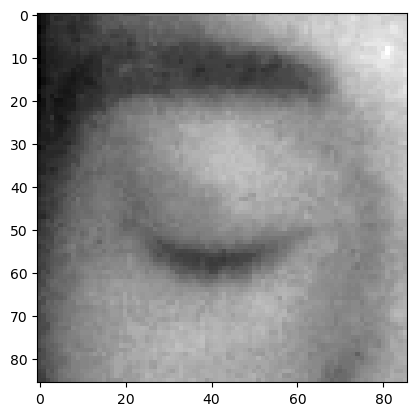

In [3]:
Datadirectory = r"C:\Users\hp\OneDrive\Desktop\Test_Dataset"
Classes = ["Closed_Eyes", "Open_Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

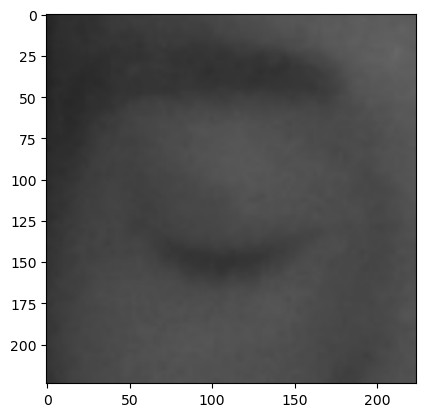

In [4]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [5]:
training_Data = []
def create_training_Data():
   for category in Classes:
       path = os.path.join(Datadirectory, category)
       class_num = Classes.index(category) # 0 1,
       for img in os.listdir(path):
           try:
               img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
               backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
               new_array = cv2.resize(backtorgb, (img_size, img_size))
               training_Data.append([new_array,class_num])
           except Exception as e:
               pass
create_training_Data()

In [6]:
import random
random.shuffle(training_Data)

In [7]:
X = []
y = []
for features,label in training_Data:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = tf.keras.applications.mobilenet.MobileNet()
base_input = model.layers[1].input ##input
base_output = model.layers[-4].output
#base_input=keras.Input(shape=(input_size,))
Flat_layers = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layers)
final_output = layers.Activation('sigmoid')(final_output)
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])
X=np.array(X)
y=np.array(y)
new_model.fit(X,y, epochs = 1, validation_split = 0.1) ##training
new_model.save('my_model.h5')

382/382 ━━━━━━━━━━━━━━━━━━━━ 1849s 5s/step - accuracy: 0.9683 - loss: 0.0885 - val_accuracy: 0.9934 - val_loss: 0.0159


In [22]:
img_array = cv2.imread(r"C:\Users\hp\OneDrive\Desktop\Test_Dataset\Open_Eyes\s0001_02642_0_1_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))
X_input = np.array(new_array).reshape(1, img_size, img_size, 3) 
X_input = X_input/255.0 #normalizing data
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [23]:
prediction=new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [24]:
prediction


array([[0.9997472]], dtype=float32)

In [26]:
import winsound
frequency = 2500  # Set frequency to 2500
duration = 10000  # Set duration to 1500 ms == 1.5 sec
import numpy as np
import cv2
from tensorflow.keras.models import load_model
#new_model=load_model("my_model.h5")
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
cap = cv2.VideoCapture(1)
#check if webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FPS, 5)
counter = 0
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if(faceCascade.empty()==False):
        print("detected")
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    # Draw a rectangle around eyes
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255.0
    new_model=load_model("my_model.h5")
    Predictions = new_model.predict(final_image)
    if (Predictions>=0.9997472):
        status = "Open Eyes"
        cv2.putText(frame,
                status,
                (150,150),
                font, 3,
                (0, 255, 0),
                2,
                cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, 'Active', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
    elif Predictions<0.99974:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame,
                status,
                (150,150),
                font, 3,
                (0, 0, 255),
                2,
                cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1 + w1, y1 + h1), (0,0,255), 2)
        if counter > 10:
            x1,y1,w1,h1 = 0,0,175,75
            #Draw black background rectangle
            cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0,0,0), -1)
            #Add text
            cv2.putText(frame, "Sleep Alert !!!", (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            winsound.Beep(frequency, duration)
            counter = 0
    cv2.imshow("Drowsiness Detection", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
#Conclusion

detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
Eyes are not detected
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step
Eyes are not detected
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
Eyes are not detected
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
Eyes are not detected
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
Eyes are not detected
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
Eyes are not detected
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
Eyes are not detected
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
Eyes are not detected
Eyes are not detected
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
